In [ ]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.1-py2.py3-none-any.whl size=311285388 sha256=038e8545cf2fb7b758ec55875e7487112836d7688800e9270fbdba8588498a3b
  Stored in directory: /root/.cache/pip/wheels/0d/77/a3/ff2f74cc9ab41f8f594dabf0579c2a7c6de920d584206e0834
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("covid19_analysis").getOrCreate()

In [ ]:
# t1 = time.start()
from pyspark.sql.types import  (StructType,
                                StructField,
                                DateType,
                                BooleanType,
                                DoubleType,
                                IntegerType,
                                StringType,
                               TimestampType)
covid_schema  = StructType([StructField("UUID", StringType(), True),
                            StructField("DEPARTAMENTO", StringType(), True),
                            StructField("PROVINCIA", StringType(), True ),
                            StructField("DISTRITO", StringType(), True),
                            StructField("METODODX", StringType(), True),
                            StructField("EDAD", IntegerType(), True  ),
                            StructField("SEXO", StringType(), True ),
                            StructField("FECHA_RESULTADO", StringType(), True )
                            ])

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')



Mounted at /content/gdrive


In [ ]:
df = spark.read.csv("/content/gdrive/MyDrive/Colab Notebooks/positivos_covid280720.csv",
                       header = True,
                        schema = covid_schema)

In [ ]:
print(" Número de casos de COVID-19 {}: ".format(df.count()))

 Número de casos de COVID-19 395005: 


In [ ]:
from pyspark.sql.functions import col, unix_timestamp, to_date

#sample data
#df = sc.parallelize([['12-21-2006'],
#                     ['05-30-2007'],
#                     ['01-01-1984'],
#                     ['12-24-2017']]).toDF(["date_in_strFormat"])
#df.printSchema()

df = df.withColumn('FECHA_RESULTADO',
                   to_date(unix_timestamp(col('FECHA_RESULTADO'), 'yyyyMMdd').cast("timestamp")))
df.show()
df.printSchema()

+--------------------+------------+---------+--------------------+--------+----+---------+---------------+
|                UUID|DEPARTAMENTO|PROVINCIA|            DISTRITO|METODODX|EDAD|     SEXO|FECHA_RESULTADO|
+--------------------+------------+---------+--------------------+--------+----+---------+---------------+
|7320cabdc1aaca6c5...|        LIMA|     LIMA|          LOS OLIVOS|     PCR|  55|MASCULINO|     2020-05-26|
|cecdbf10074dbc011...|        LIMA|     LIMA|SAN JUAN DE LURIG...|     PCR|  34|MASCULINO|     2020-05-21|
|71ecb6bccb248b0bb...|        LIMA|     LIMA|               COMAS|     PCR|  42| FEMENINO|     2020-05-28|
|566af4276cbe9359a...|        LIMA|     LIMA|          SAN MIGUEL|     PCR|  55|MASCULINO|     2020-05-12|
|f016889b9ba5bd95c...|        LIMA|     LIMA|         EL AGUSTINO|     PCR|  48| FEMENINO|     2020-04-06|
|971f8e1295583756d...|        LIMA|     LIMA|               BRE�A|     PCR|  59|MASCULINO|     2020-04-20|
|0e2a1928ddd07d999...|      CALLAO|  

In [ ]:
filtered = df.where(df["DEPARTAMENTO"] == "CUSCO")
filtered.show(n = 10)

+--------------------+------------+-------------+--------+--------+----+---------+---------------+
|                UUID|DEPARTAMENTO|    PROVINCIA|DISTRITO|METODODX|EDAD|     SEXO|FECHA_RESULTADO|
+--------------------+------------+-------------+--------+--------+----+---------+---------------+
|b47182e3d1ab6b1b1...|       CUSCO|        CUSCO|   CUSCO|     PCR|  49|MASCULINO|     2020-07-05|
|c1e97f0913a3491c8...|       CUSCO|        CUSCO|   CUSCO|     PCR|  65| FEMENINO|     2020-07-05|
|699e470bc9ac42ef6...|       CUSCO|        CUSCO|SANTIAGO|     PCR|  54|MASCULINO|     2020-07-05|
|a4ce0fc24b8aa540d...|       CUSCO|        CUSCO|   CUSCO|     PCR|  33|MASCULINO|     2020-07-05|
|19b907a5600f1e5a0...|       CUSCO|        CUSCO|SANTIAGO|     PCR|  29|MASCULINO|     2020-07-05|
|6851e22a1667e6cf9...|       CUSCO|        CUSCO|   CUSCO|     PCR|  33| FEMENINO|     2020-07-05|
|695edd13175eb0ec8...|       CUSCO|LA CONVENCION| PICHARI|     PCR|  24|MASCULINO|     2020-07-16|
|af314be39

In [ ]:
from pyspark.sql.functions import *
#infected = filtered.replace(regex={'Á':'A','É':'E','Í':'I','Ó':'O','Ú':'U','À':'A','È':'E','Ì':'I','Ò':'O','Ù':'U'})
infected = filtered.withColumn('PROVINCIA', regexp_replace('PROVINCIA', 'Á', 'A'))
infected = filtered.withColumn('PROVINCIA', regexp_replace('PROVINCIA', 'Ó', 'O'))
infected.show()
# tf =time.end()


# infected = infected.replace('Á':'A','É':'E','Í':'I','Ó':'O','Ú':'U','À':'A','È':'E','Ì':'I','Ò':'O','Ù':'U'})


+--------------------+------------+-------------+----------+--------+----+---------+---------------+
|                UUID|DEPARTAMENTO|    PROVINCIA|  DISTRITO|METODODX|EDAD|     SEXO|FECHA_RESULTADO|
+--------------------+------------+-------------+----------+--------+----+---------+---------------+
|b47182e3d1ab6b1b1...|       CUSCO|        CUSCO|     CUSCO|     PCR|  49|MASCULINO|     2020-07-05|
|c1e97f0913a3491c8...|       CUSCO|        CUSCO|     CUSCO|     PCR|  65| FEMENINO|     2020-07-05|
|699e470bc9ac42ef6...|       CUSCO|        CUSCO|  SANTIAGO|     PCR|  54|MASCULINO|     2020-07-05|
|a4ce0fc24b8aa540d...|       CUSCO|        CUSCO|     CUSCO|     PCR|  33|MASCULINO|     2020-07-05|
|19b907a5600f1e5a0...|       CUSCO|        CUSCO|  SANTIAGO|     PCR|  29|MASCULINO|     2020-07-05|
|6851e22a1667e6cf9...|       CUSCO|        CUSCO|     CUSCO|     PCR|  33| FEMENINO|     2020-07-05|
|695edd13175eb0ec8...|       CUSCO|LA CONVENCION|   PICHARI|     PCR|  24|MASCULINO|     20

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df_group_count  = filtered.groupBy(["FECHA_RESULTADO", "PROVINCIA"]).count().collect()
fecha = [item[0] for item in df_group_count]
count = [item[2] for item in df_group_count]
provincia = [item[1] for item in df_group_count]
df_group_count = {"PROVINCIA" : provincia, "FECHA": fecha, "count": count}
df_group_count = pd.DataFrame(df_group_count)
df_group_count = df_group_count.sort_values(by = "FECHA", ascending  = True)
df_group_count = df_group_count.set_index(['PROVINCIA','FECHA']).sort_index()
df_group_count.head(10)

count
PROVINCIA FECHA            
ACOMAYO   2020-05-11      2
          2020-05-12      1
          2020-05-13      1
          2020-05-22      1
          2020-05-28      9
          2020-06-02      2
          2020-06-05      2
          2020-06-07      1
          2020-06-12      4
          2020-06-25      1

In [ ]:
names = filtered.select('PROVINCIA').rdd.flatMap(lambda x: x).distinct().collect()
names

['LA CONVENCION',
 'CANCHIS',
 'ANTA',
 'EN INVESTIGACI�N',
 'ESPINAR',
 'CUSCO',
 'ACOMAYO',
 'QUISPICANCHI',
 'URUBAMBA',
 'CALCA',
 'CHUMBIVILCAS',
 'PARURO',
 'PAUCARTAMBO',
 'CANAS']

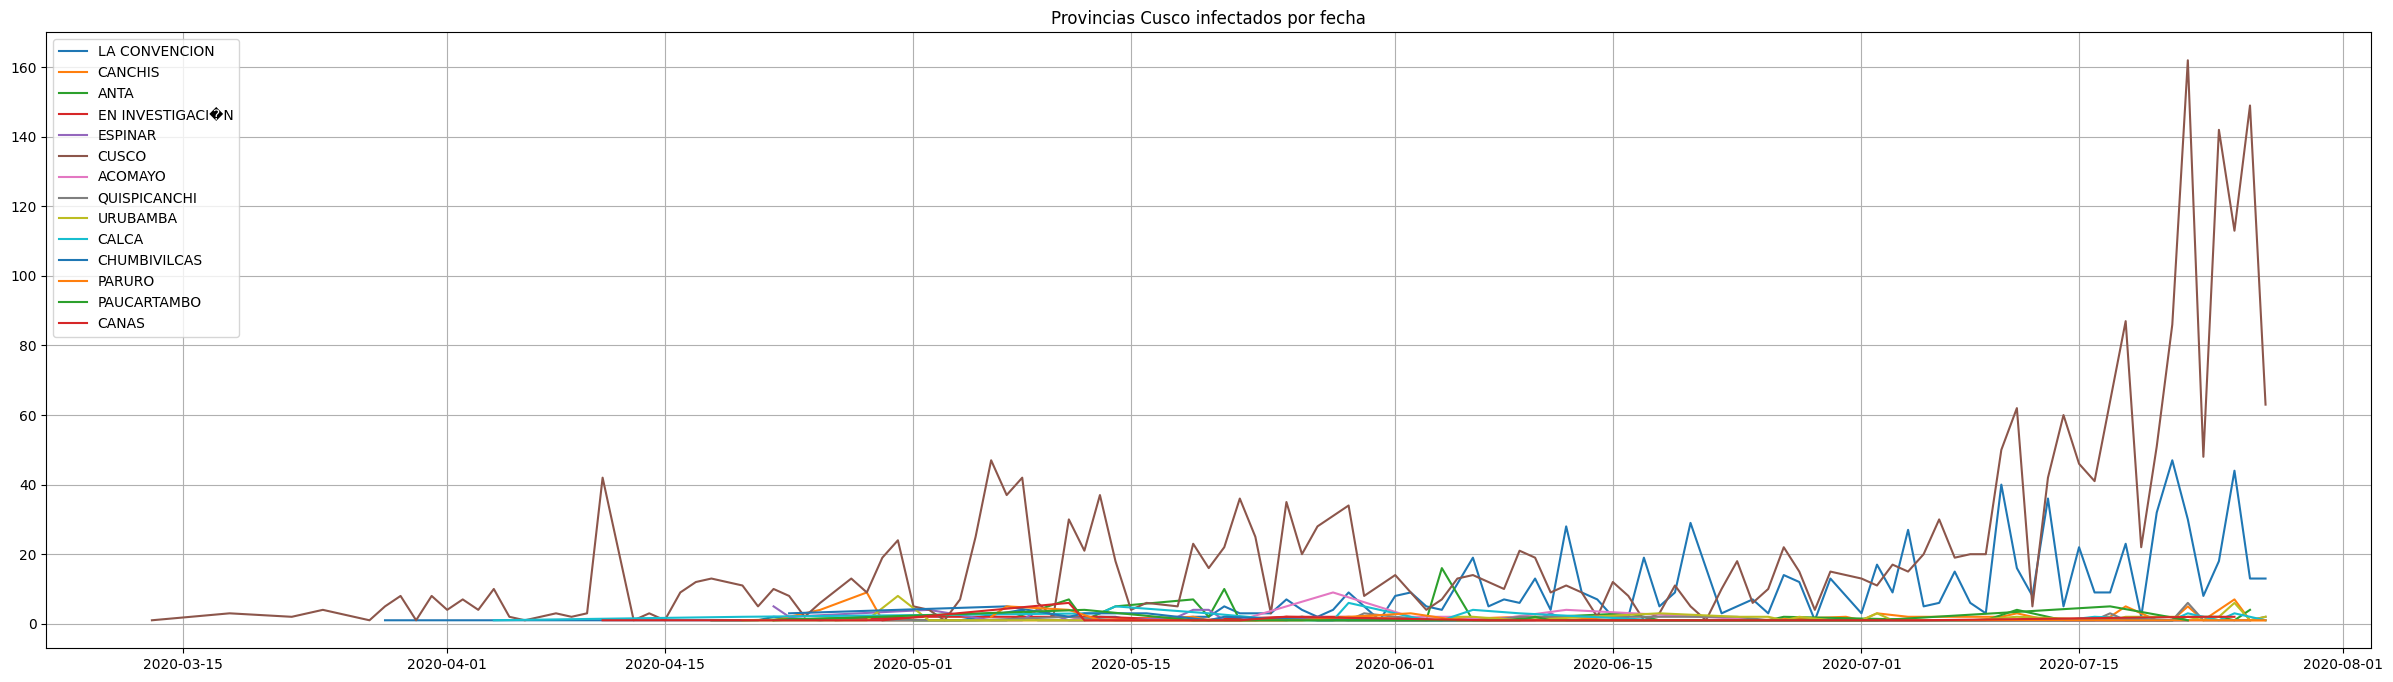

In [ ]:
plt.figure(figsize = (30, 8))
def provincia_plot(name):
    data = df_group_count.loc[name]

    plt.plot(data.index, data.values)
# provincia_plot('CUSCO')

# names = filtered['PROVINCIA'].unique().tolist()
# names

for name in names:
    provincia_plot(name)

plt.legend(names)
plt.title('Provincias Cusco infectados por fecha')
plt.grid(True)

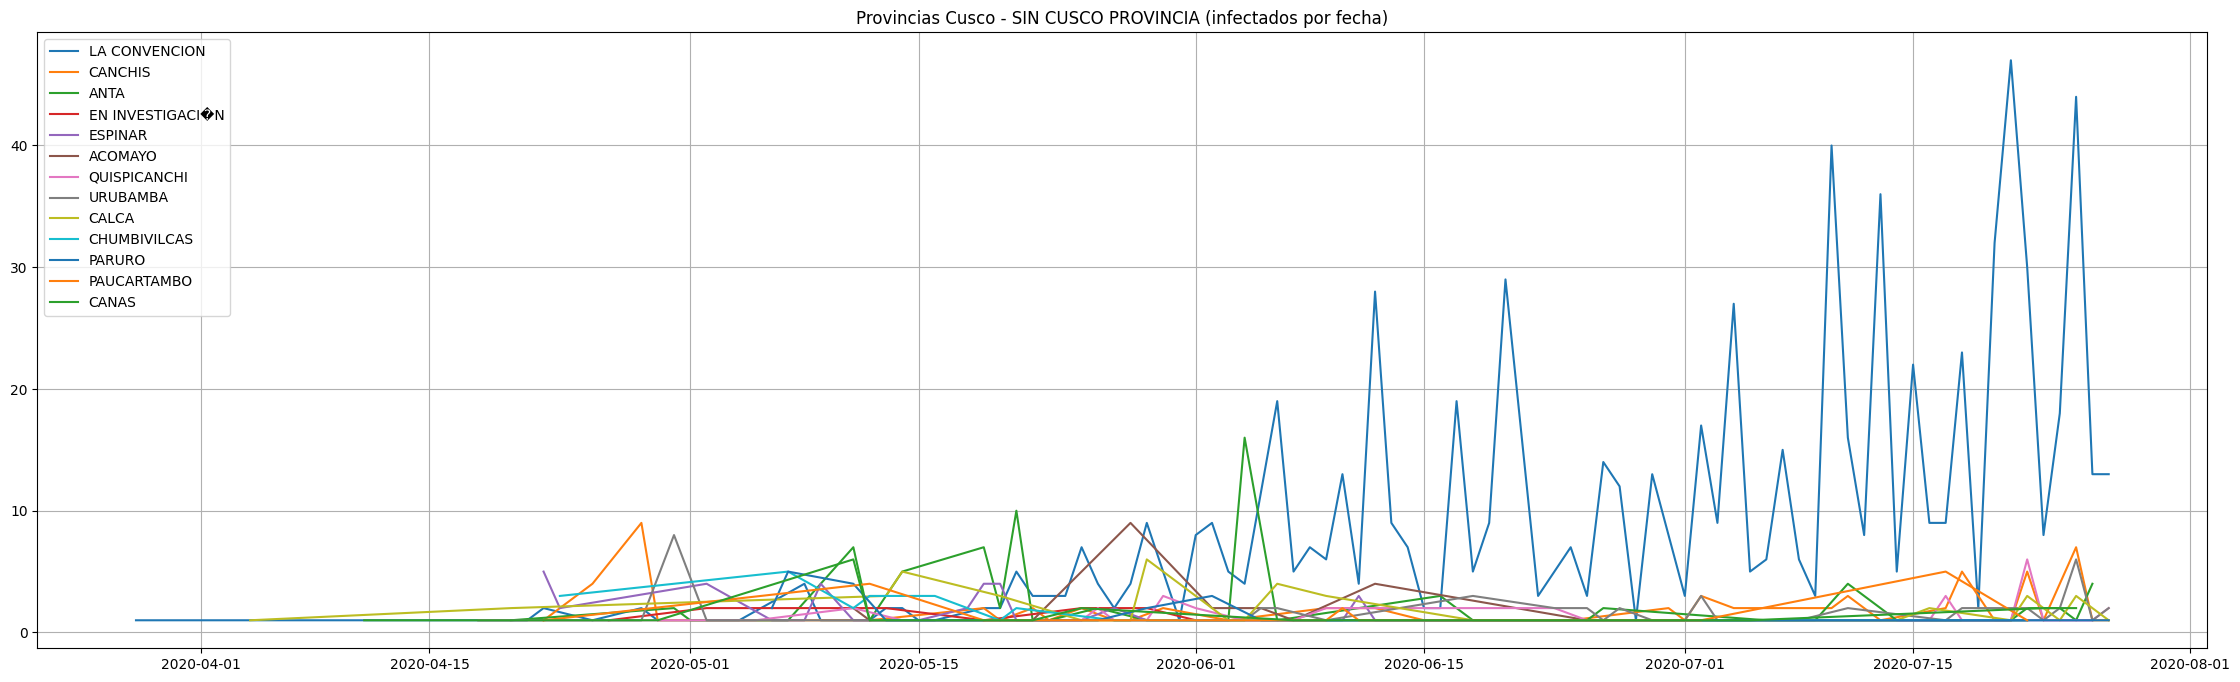

In [ ]:
sin_cusco = names.copy()
sin_cusco.remove('CUSCO')
plt.figure(figsize = (28, 8))
for name in sin_cusco:
    provincia_plot(name)

plt.legend(sin_cusco)
plt.title('Provincias Cusco - SIN CUSCO PROVINCIA (infectados por fecha)')
plt.grid(True)